In [1]:
import numpy as np
import pylab
from scipy.integrate import quad

In [2]:
def exp(x):
    return np.exp(x)

def coscos(x):
    return np.cos(np.cos(x))

In [3]:
xActual=np.linspace(-2*np.pi,4*np.pi,300)       # Constructing An Array Of Evenly Spaced Numbers Over A Specified Interval
xExpected=np.linspace(0,2*np.pi,100)            # Constructing An Array Of Evenly Spaced Numbers Over A Specified Interval
xExpected=np.tile(xExpected,3)                  # Constructing An Array By Repeating xExpected Three Times

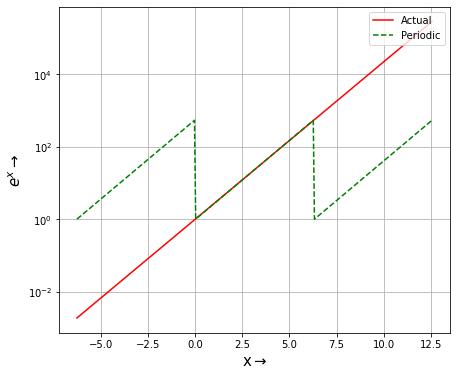

In [4]:
pylab.figure(figsize=(7,6))                                         # Creating A New Figure
pylab.semilogy(xActual,exp(xActual),'-r',label='Actual')            # Making A Plot With Log Scaling On The y-axis
pylab.semilogy(xActual,exp(xExpected),'--g',label='Periodic')       # Making A Plot With Log Scaling On The y-axis
pylab.xlabel(r'x$\rightarrow$',fontsize=15)                         # Setting The Label For The x-axis
pylab.ylabel(r'$e^{x}\rightarrow$',fontsize=15)                     # Setting The Label For The y-axis
pylab.legend(loc='upper right')                                     # Placing A Legend On The Top Right Corner Of The Graph
pylab.grid(True)                                                    # Displaying The Grid

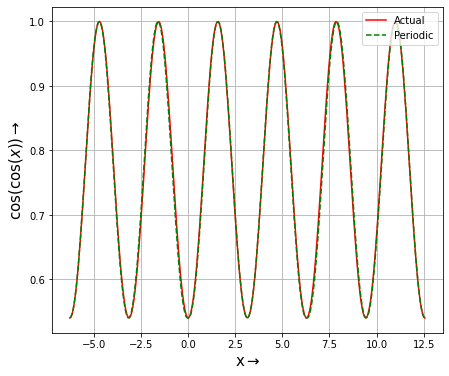

In [5]:
pylab.figure(figsize=(7,6))                                         # Creating A New Figure
pylab.plot(xActual,coscos(xActual),'-r',label='Actual')             # Ploting y vs x As Lines And Markers
pylab.plot(xActual,coscos(xExpected),'--g',label='Periodic')        # Ploting y vs x As Lines And Markers
pylab.xlabel(r'x$\rightarrow$',fontsize=15)                         # Setting The Label For The x-axis
pylab.ylabel(r'$\cos(\cos(x))\rightarrow$',fontsize=15)             # Setting The Label For The y-axis
pylab.legend(loc='upper right')                                     # Placing A Legend On The Top Right Corner Of The Graph
pylab.grid(True)                                                    # Displaying The Grid

In [6]:
functions={'exp(x)':exp,'cos(cos(x))':coscos}
# Function To Find Fourier Coefficient
def findCoefficient(n,function):
    coefficient=np.zeros(n)                                         # Constructing A Array Filled With Zeros
    fourier=functions[function]
    a=lambda x,k:fourier(x)*np.cos(k*x)                             # Cosine Function
    b=lambda x,k:fourier(x)*np.sin(k*x)                             # Sine Function
    coefficient[0]=quad(fourier,0,2*np.pi)[0]/(2*np.pi)             # DC Coefficient
    for i in range(1,n,2):
        coefficient[i]=quad(a,0,2*np.pi,args=((i+1)/2))[0]/np.pi    # Sine Coefficient
    for i in range(2,n,2):
        coefficient[i]=quad(b,0,2*np.pi,args=(i/2))[0]/np.pi        # Cosine Coefficient
    return coefficient

In [7]:
coefficientExp=findCoefficient(51,'exp(x)')                 # Fourier Coefficients of exp(x)
coefficientCosCos=findCoefficient(51,'cos(cos(x))')         # Fourier Coefficients of cos(cos(x))

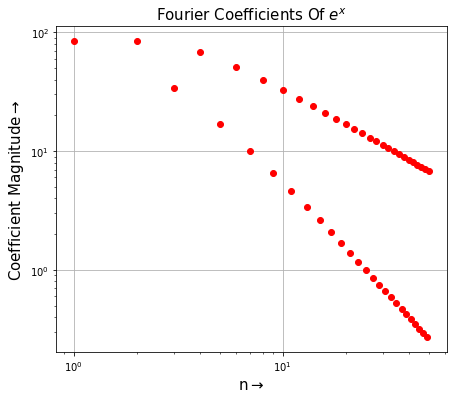

In [8]:
pylab.figure(figsize=(7,6))                                         # Creating A New Figure
pylab.loglog(range(51),np.abs(coefficientExp),'ro')                 # Making A Plot With Log Scaling On Both The Axis
pylab.xlabel(r'n$\rightarrow$',fontsize=15)                         # Setting The Label For The x-axis
pylab.ylabel(r'Coefficient Magnitude$\rightarrow$',fontsize=15)     # Setting The Label For The y-axis
pylab.title('Fourier Coefficients Of $e^{x}$',fontsize=15)          # Setting Title Of The Graph
pylab.grid(True)                                                    # Displaying The Grid

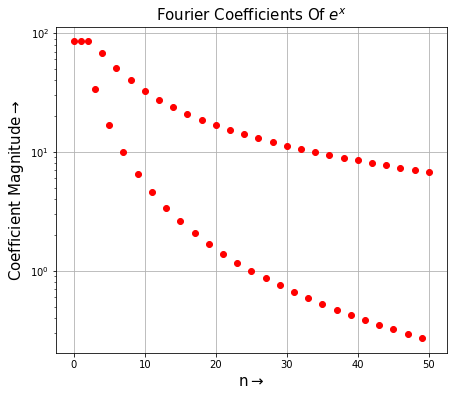

In [9]:
pylab.figure(figsize=(7,6))                                         # Creating A New Figure
pylab.semilogy(range(51),np.abs(coefficientExp),'ro')               # Making A Plot With Log Scaling On The y-axis
pylab.xlabel(r'n$\rightarrow$',fontsize=15)                         # Setting The Label For The x-axis
pylab.ylabel(r'Coefficient Magnitude$\rightarrow$',fontsize=15)     # Setting The Label For The y-axis
pylab.title('Fourier Coefficients Of $e^{x}$',fontsize=15)          # Setting Title Of The Graph
pylab.grid(True)                                                    # Displaying The Grid

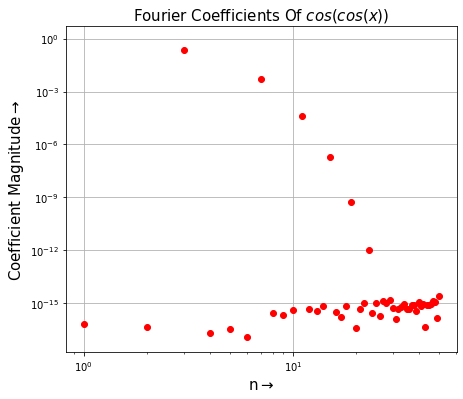

In [10]:
pylab.figure(figsize=(7,6))                                         # Creating A New Figure
pylab.loglog(range(51),np.abs(coefficientCosCos),'ro')              # Making A Plot With Log Scaling On Both The Axis
pylab.xlabel(r'n$\rightarrow$',fontsize=15)                         # Setting The Label For The x-axis
pylab.ylabel(r'Coefficient Magnitude$\rightarrow$',fontsize=15)     # Setting The Label For The y-axis
pylab.title('Fourier Coefficients Of $cos(cos(x))$',fontsize=15)    # Setting Title Of The Graph
pylab.grid(True)                                                    # Displaying The Grid

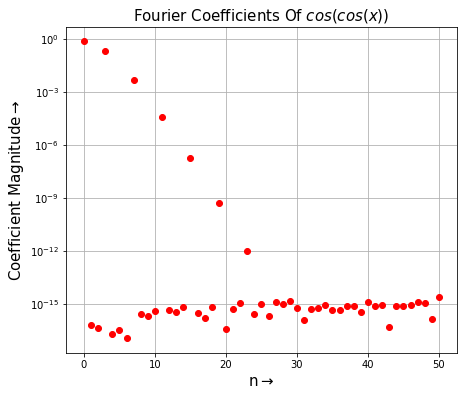

In [11]:
pylab.figure(figsize=(7,6))                                         # Creating A New Figure
pylab.semilogy(range(51),np.abs(coefficientCosCos),'ro')            # Making A Plot With Log Scaling On Both The Axis
pylab.xlabel(r'n$\rightarrow$',fontsize=15)                         # Setting The Label For The x-axis
pylab.ylabel(r'Coefficient Magnitude$\rightarrow$',fontsize=15)     # Setting The Label For The y-axis
pylab.title('Fourier Coefficients Of $cos(cos(x))$',fontsize=15)    # Setting Title Of The Graph
pylab.grid(True)                                                    # Displaying The Grid

In [12]:
x=np.linspace(0,2*np.pi,401)
x=x[:-1]
y=np.linspace(0,2*np.pi,400)
A=np.zeros((400,51))
A[:,0]=1
for k in range(1,26):
    A[:,2*k-1]=np.cos(k*x)
    A[:,2*k]=np.sin(k*x) 
bExp=exp(x)  
bCosCos=coscos(x)
cExp=np.linalg.lstsq(A,bExp)[0]
cCosCos=np.linalg.lstsq(A,bCosCos)[0]

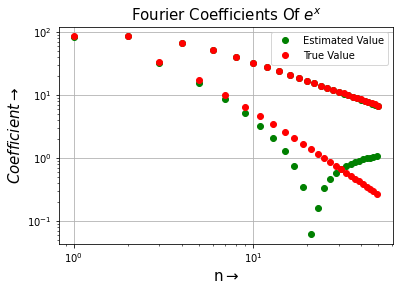

In [13]:
pylab.loglog(range(51),np.abs(cExp),'go',label='Estimated Value')           # Making A Plot With Log Scaling On Both The Axis
pylab.loglog(range(51),np.abs(coefficientExp),'ro',label='True Value')      # Making A Plot With Log Scaling On Both The Axis
pylab.xlabel(r'n$\rightarrow$',fontsize=15)                                 # Setting The Label For The x-axis
pylab.ylabel(r'$Coefficient\rightarrow$',fontsize=15)                       # Setting The Label For The y-axis
pylab.legend(loc='upper right')                                             # Placing A Legend On The Top Right Corner Of The Graph
pylab.title('Fourier Coefficients Of $e^{x}$',fontsize=15)                  # Setting Title Of The Graph
pylab.grid(True)                                                            # Displaying The Grid

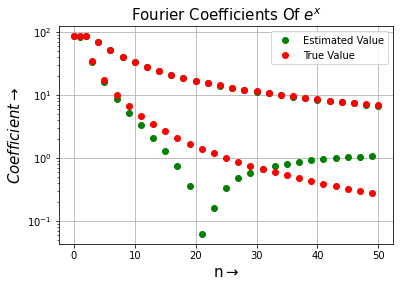

In [14]:
pylab.semilogy(range(51),np.abs(cExp),'go',label='Estimated Value')         # Making A Plot With Log Scaling On The y-axis
pylab.semilogy(range(51),np.abs(coefficientExp),'ro',label='True Value')    # Making A Plot With Log Scaling On The y-axis
pylab.xlabel(r'n$\rightarrow$',fontsize=15)                                 # Setting The Label For The x-axis
pylab.ylabel(r'$Coefficient\rightarrow$',fontsize=15)                       # Setting The Label For The y-axis
pylab.legend(loc='upper right')                                             # Placing A Legend On The Top Right Corner Of The Graph
pylab.title('Fourier Coefficients Of $e^{x}$',fontsize=15)                  # Setting Title Of The Graph
pylab.grid(True)                                                            # Displaying The Grid

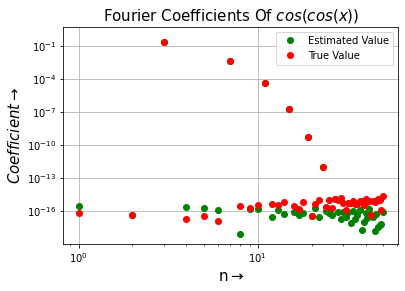

In [15]:
pylab.loglog(range(51),np.abs(cCosCos),'go',label='Estimated Value')        # Making A Plot With Log Scaling On Both The Axis
pylab.loglog(range(51),np.abs(coefficientCosCos),'ro',label='True Value')   # Making A Plot With Log Scaling On Both The Axis
pylab.xlabel(r'n$\rightarrow$',fontsize=15)                                 # Setting The Label For The x-axis
pylab.ylabel(r'$Coefficient\rightarrow$',fontsize=15)                       # Setting The Label For The y-axis
pylab.legend(loc='upper right')                                             # Placing A Legend On The Top Right Corner Of The Graph
pylab.title('Fourier Coefficients Of $cos(cos(x))$',fontsize=15)            # Setting Title Of The Graph
pylab.grid(True)                                                            # Displaying The Grid

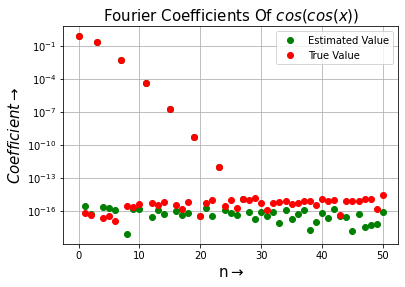

In [16]:
pylab.semilogy(range(51),np.abs(cCosCos),'go',label='Estimated Value')      # Making A Plot With Log Scaling On The y-axis
pylab.semilogy(range(51),np.abs(coefficientCosCos),'ro',label='True Value') # Making A Plot With Log Scaling On The y-axis
pylab.xlabel(r'n$\rightarrow$',fontsize=15)                                 # Setting The Label For The x-axis
pylab.ylabel(r'$Coefficient\rightarrow$',fontsize=15)                       # Setting The Label For The y-axis
pylab.legend(loc='upper right')                                             # Placing A Legend On The Top Right Corner Of The Graph
pylab.title('Fourier Coefficients Of $cos(cos(x))$',fontsize=15)            # Setting Title Of The Graph
pylab.grid(True)                                                            # Displaying The Grid

In [17]:
deviationExp=abs(coefficientExp-cExp)
deviationCosCos=abs(coefficientCosCos-cCosCos)
maxDeviationExp=np.max(deviationExp)
maxDeviationCosCos=np.max(deviationCosCos)
print(maxDeviationExp)
print(maxDeviationCosCos)

1.3327308703353395
2.691038055079395e-15


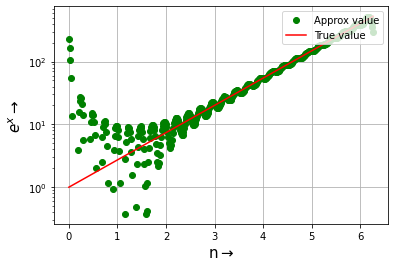

In [18]:
approxExp=np.matmul(A,cExp)                                     # Matrix Product Of Two Arrays
pylab.semilogy(x,approxExp,'go',label="Approx value")           # Making A Plot With Log Scaling On The y-axis
pylab.semilogy(x,exp(x),'-r',label='True value')                # Making A Plot With Log Scaling On The y-axis
pylab.xlabel(r'n$\rightarrow$',fontsize=15)                     # Setting The Label For The x-axis
pylab.ylabel(r'$e^{x}\rightarrow$',fontsize=15)                 # Setting The Label For The y-axis
pylab.legend(loc='upper right')                                 # Placing A Legend On The Top Right Corner Of The Graph
pylab.grid(True)                                                # Displaying The Grid

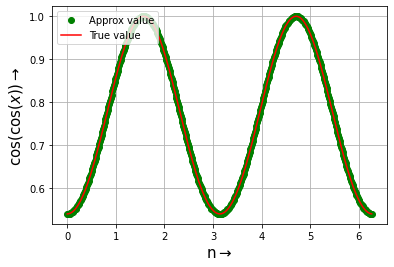

In [19]:
approxCosCos=np.matmul(A,cCosCos)                               # Matrix Product Of Two Arrays
pylab.plot(x,approxCosCos,'go',label="Approx value")            # Ploting y vs x As Lines And Markers
pylab.plot(x,coscos(x),'-r',label='True value')                 # Ploting y vs x As Lines And Markers
pylab.xlabel(r'n$\rightarrow$',fontsize=15)                     # Setting The Label For The x-axis
pylab.ylabel(r'$\cos(\cos(x))\rightarrow$',fontsize=15)         # Setting The Label For The y-axis
pylab.legend(loc='upper left')                                  # Placing A Legend On The Top Right Corner Of The Graph
pylab.grid(True)                                                # Displaying The Grid